# **Augmentasi Data**

Augmentasi data adalah proses sistematis untuk memperluas atau memperkaya kumpulan data pelatihan dengan cara menciptakan variasi baru dari data yang sudah ada melalui transformasi tertentu, tanpa mengubah makna atau label aslinya.

Dalam deep learning, augmentasi data dilakukan dengan mengubah citra seperti rotasi, flipping, pemotongan acak, perubahan warna, atau penambahan noise agar model dapat mengenali objek dengan lebih baik di berbagai kondisi.
Dengan kata lain, augmentasi data adalah teknik untuk meningkatkan keragaman data pelatihan secara artificial guna membantu model belajar pola yang lebih umum, bukan hanya menghafal data tertentu.


**Analogi**

Bayangkan ketika kita sedang belajar mengenali jenis kendaraan seperti mobil, motor, dan bus.
Jika kita hanya melihat gambar mobil dari satu sisi saja, kita mungkin tidak tahu jika mobil yang sama bisa terlihat berbeda dari depan atau belakang.

Namun jika kita melihat mobil dari berbagai sudut, warna, dan ukuran, kita akan lebih mudah mengenalinya di mana pun, entah di jalan raya, parkiran, atau foto yang gelap.
Nah, augmentasi data bekerja seperti itu: model “dilatih” dengan banyak versi berbeda dari data yang sama agar tidak bingung ketika melihat data baru di kondisi yang sedikit berbeda.


In [ ]:
import PIL
import torch
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torchvision.transforms as T

- PIL / from PIL import Image: untuk baca & mengolah citra (gambar).

- torch: dipakai untuk operasi tensor (nanti untuk noise).

- Path: mempermudah akses file (misal 'datadpl.jpg').

- matplotlib.pyplot as plt: untuk menampilkan gambar di notebook.

- numpy as np: untuk melihat bentuk (shape) gambar sebagai array.

- torchvision.transforms as T: berisi fungsi-fungsi augmentasi (Resize, Grayscale, Rotation, dll).

## Membaca & menampilkan citra asli

In [ ]:
img = PIL.Image.open(Path('datacoba.jpg'))

Baris ini membaca file gambar bernama datacoba.jpg dan menyimpannya sebagai objek img (tipe PIL.Image).

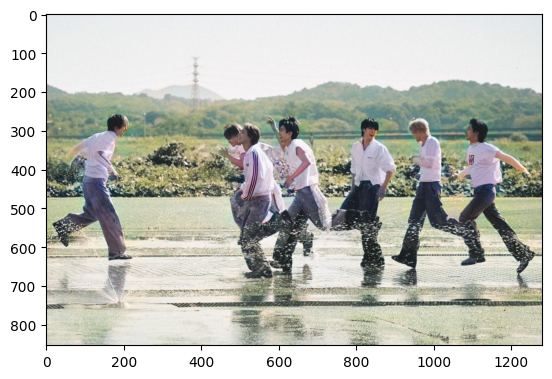

In [ ]:
np.asarray(img).shape
plt.imshow(img)
img.show()

- np.asarray(img).shape : mengubah gambar menjadi array NumPy dan melihat ukuran gambar: (height, width, channels).

- plt.imshow(img) : menampilkan gambar di dalam notebook.

- img.show() : membuka jendela viewer gambar default di komputer (opsional, kadang tidak dipakai di Colab).

# Horizontal Flip (membalik kiri ↔ kanan)

Teknik ini sering digunakan karena orientasi kiri/kanan biasanya tidak mengubah makna objek, sehingga aman untuk augmentasi.

(np.float64(-0.5), np.float64(1279.5), np.float64(853.5), np.float64(-0.5))

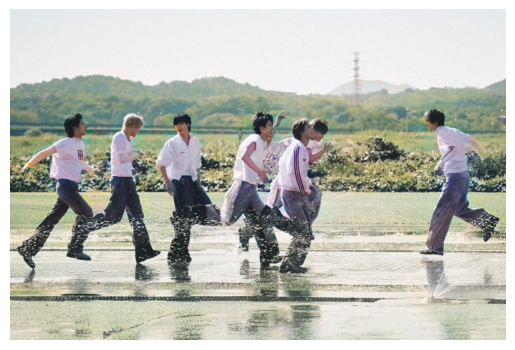

In [ ]:
horizontal_flip = T.RandomHorizontalFlip(p=1.0)
flipped_horizontal = horizontal_flip(img)

plt.imshow(flipped_horizontal)
plt.axis("off")

- T.RandomHorizontalFlip(p=1.0)

> Membuat transformasi horizontal flip.

> p=1.0 berarti 100% dipastikan dibalik.

> Jika diisi p=0.5 , 50% kemungkinan dibalik, 50% tetap.

- flipped_horizontal = horizontal_flip(img)

> Menerapkan transformasi ke gambar asli.

>Output-nya adalah gambar yang sudah dibalik kiri-kanan.

- plt.imshow(flipped_horizontal)

> Menampilkan gambar hasil flip.

- plt.axis("off")

> Menghilangkan angka sumbu supaya tampilan lebih rapi.

# Vertical Flip (membalik atas ↔ bawah)

(np.float64(-0.5), np.float64(1279.5), np.float64(853.5), np.float64(-0.5))

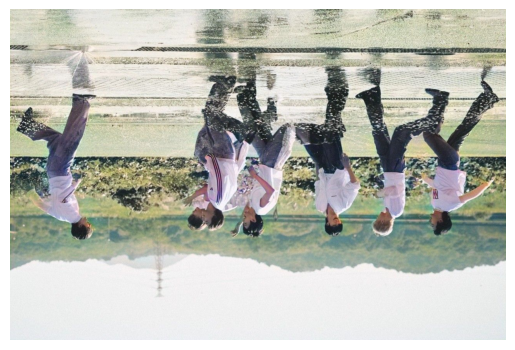

In [ ]:
vertical_flip = T.RandomVerticalFlip(p=1.0)
flipped_vertical = vertical_flip(img)

plt.imshow(flipped_vertical)
plt.axis("off")

- T.RandomVerticalFlip(p=1.0)

> Membuat transformasi vertical flip.

> p=1.0 → selalu dibalik atas–bawah.

> Jika p=0.5 , hanya dibalik pada 50% gambar.

- flipped_vertical = vertical_flip(img)

> Menerapkan pembalikan vertikal ke gambar input.

- plt.imshow(flipped_vertical)

> Menampilkan citra hasil flip atas–bawah.

- plt.axis("off")

> Menghilangkan sumbu untuk tampilan bersih.

# Resize image

Resize digunakan agar semua citra punya ukuran yang sama sebelum masuk ke model, sehingga mempermudah pemrosesan dan training.

In [ ]:
resize_transform = T.Resize((64,64))
resized_image=resize_transform(img)

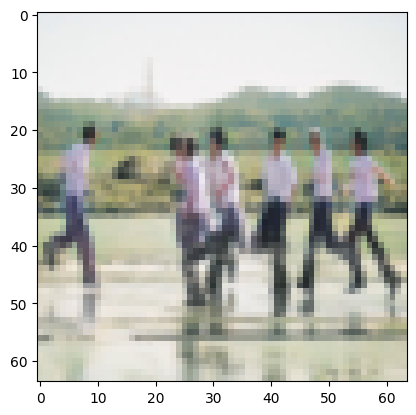

In [ ]:
plt.imshow(resized_image)

- T.Resize((64,64)) membuat transformasi yang mengubah ukuran gambar menjadi 64×64 piksel.

- resized_image = resize_transform(img) menerapkan transformasi tersebut ke img.

- plt.imshow(resized_image) menampilkan hasil resize.


# Random Rotation

Random rotation digunakan agar model arsitektur tidak “kaget” ketika objek di dunia nyata miring/berputar, jadi model belajar lebih invariant terhadap rotasi.

In [ ]:
random_rotation_transformation_45 = T.RandomRotation(45)

T.RandomRotation(45) artinya setiap kali dipanggil, gambar akan diputar dengan sudut acak di interval [-45°, 45°]. Begitu juga 85 dan 65, hanya beda batas sudutnya (semakin besar, rotasi bisa lebih ekstrim).

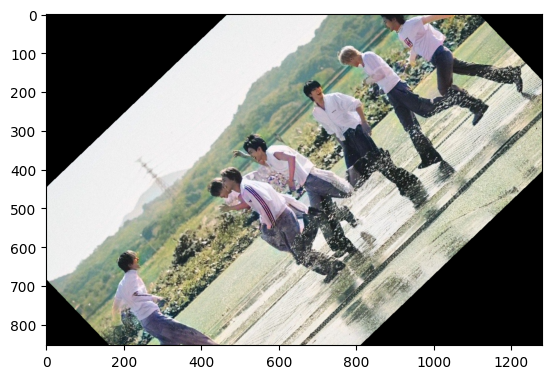

In [ ]:
plt.imshow(random_rotation_transformation_45(img))

Di sini, transformasi langsung diterapkan ke img untuk melihat contoh hasil rotasinya.

# Random Crop

Random crop membuat model belajar dari bagian-bagian berbeda dari gambar (kadang objek tidak selalu di tengah).

In [ ]:
size_of_crop = 700
random_crops = T.RandomCrop(size = size_of_crop)
required_image = random_crops(img)

- size_of_crop = 700 : ukuran potongan (crop) yang diambil: 700×700 piksel.

- T.RandomCrop(size=700) : setiap kali dipanggil, transformasi ini akan memotong bagian acak dari gambar dengan ukuran tersebut.

- required_image = random_crops(img) : menghasilkan satu patch acak dari gambar.

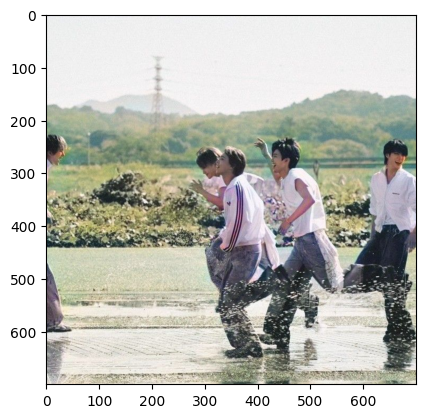

In [ ]:
plt.imshow(required_image)

# Gaussian Blur

Gaussian blur membuat gambar sedikit kabur. Augmentasi ini melatih model untuk tetap bisa mengenali objek meskipun citra kurang tajam (misal kamera out of focus).

In [ ]:
gausian_blur_transformation_13 = T.GaussianBlur(kernel_size = (7,13), sigma = (6 , 7))
gausian_blurred_image_13 = gausian_blur_transformation_13(img)

- T.GaussianBlur menerapkan filter blur Gaussian pada gambar.

- kernel_size = (7,13) : ukuran “jendela” filter (7×13 piksel).

- sigma = (6,7) : mengatur seberapa kuat blur (semakin besar sigma, gambar makin halus).

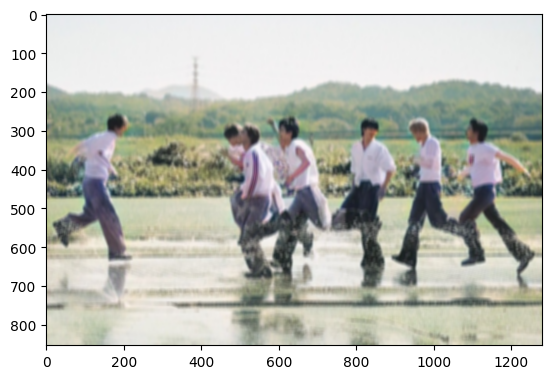

In [ ]:
plt.imshow(gausian_blurred_image_13)

# Penambahan Noise Acak pada Piksel

In [ ]:
def addnoise(input_image, noise_factor = 0.3):
    inputs = T.ToTensor()(input_image)
    noise = inputs + torch.rand_like(inputs) * noise_factor
    noise = torch.clip (noise,0,1.)
    output_image = T.ToPILImage()
    image = output_image(noise)
    return image

gausian_image_3 = addnoise(img)

- T.ToTensor()(input_image) mengubah gambar menjadi tensor dengan nilai piksel di [0,1].

- torch.rand_like(inputs) * noise_factor membuat noise acak (uniform 0 sampai noise_factor).

- Ditambahkan ke gambar: inputs + noise.

- torch.clip(noise, 0, 1.) memastikan nilai piksel tetap di rentang [0,1].

- T.ToPILImage() mengubah kembali ke gambar.

- gausian_image_3 : noise sedang (0.3), semakin tinggi angkanya maka noisenya akan semakin kuat

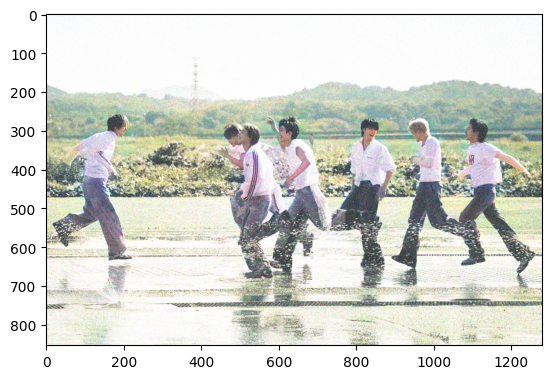

In [ ]:
plt.imshow(gausian_image_3)

# Colour Jitter (Brightness, Contrast, Saturation, Hue)

Colour jitter membuat model lebih tahan terhadap perbedaan pencahayaan dan warna di dunia nyata (misal foto diambil di ruangan terang/gelap, atau kamera berbeda).

In [ ]:
colour_jitter_transformation_1 = T.ColorJitter(brightness=(0.5,1.5),contrast=(3),saturation=(0.3,1.5),hue=(-0.1,0.1))
colour_jitter_image_1 = colour_jitter_transformation_1(img)

- ColorJitter mengubah kecerahan (brightness), kontras (contrast), kejenuhan warna (saturation), dan hue secara acak.

Misalnya:

- brightness=(0.5,1.5) : faktor kecerahan dipilih acak antara 0.5× sampai 1.5× dari nilai asli.

- hue=(-0.1,0.1) : sedikit menggeser rona warna.

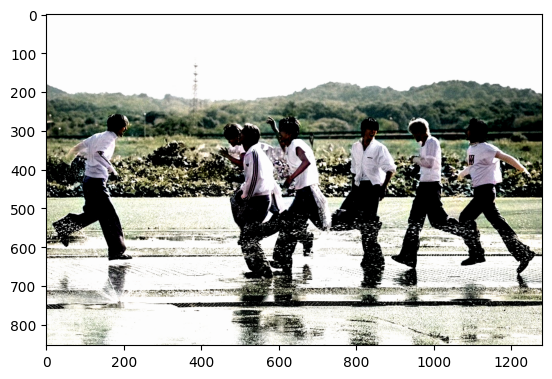

In [ ]:
plt.imshow(colour_jitter_image_1)